In [1]:
# # Parse and read html
# !pip install beautifulsoup4 --upgrade --quiet  

In [2]:
# # handling and Manipulating Tabular Data
# !pip install pandas --upgrade --quiet
# # Numerical operations
# !pip install numpy
# # visualizer
# !pip install matplotlib

In [3]:
# # Sentiment analyzer
# !pip install -U textblob --upgrade --quiet

In [4]:
# # NLTK Module
# # Using natural language tool kit to import stop words
# # Sentiment analyzer
# !pip install nltk --upgrade  --quiet 

In [5]:
# # nltk downloads for the Project
# import nltk
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

In [6]:
# # Basic aricle summarization
# !pip install newspaper3k --upgrade --quiet

In [7]:
# # Deep learning article summarization
# !pip install transformers --upgrade --quiet

In [8]:
# Import the necessary libraries ------> requests
import requests
from urllib.request import urlopen,Request

In [9]:
# Import the necessary libraries ------> BeautifulSoup
from bs4 import BeautifulSoup

In [10]:
# Import the necessary libraries ------> Pandas,numpy,matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [11]:
# Import the necessary libraries ------> nltk Module, sentiment analyser nltk vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
# Import the necessary libraries ------> sentiment analyser textblob
from textblob import TextBlob
from textblob import Word

In [13]:
# # Import the necessary libraries ------> basic aricle summarization 
from newspaper import Article

In [14]:
# Strip out unwanted URLs
import re 

In [15]:
# create CSVStock Sentiment Analysis and Summarization via Web scrapping
import csv

In [16]:
# Change input here

input_stock = "SPY"

In [17]:
def finviz_parser_data(ticker):
    
    url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
    # sending request for getting the html code of the Url
    try:
        request = Request(url=url,headers={'user-agent':'my-app'})
        response = urlopen(request)

        #parsing the HTML with BeautifulSoup
        soup = BeautifulSoup(response,'html')
        return soup
    except Exception as e:
        print(e)
    
def correct_time_formatting(time_data):
    date = []
    time=[]
    for z in time_data:
        a = z.split(" ")
        if len(a) == 2:
            date.append(a[0])
            time.append(a[1])
        else:
            date.append("r")
            time.append(a[0])
    l=0
    r=1
    lister=[]
    #print(l,r)
    while r<len(date):
        if len(date[r]) ==9:
            lister.append(date[l:r])
            #print(l,r)
            l=r
            #print(l,r)
        elif r== len(date)-1:                      
                r=len(date)    
                #print(l,r)
                lister.append(date[l:r])
        r+=1
    n =0
    while n <len(lister):

        lister[n] =[lister[n][0] for x in lister[n] if x=='r' or x==lister[n][0] ]
        n+=1
    final_time= []
    y =0
    while y<len(lister):
        final_time+=lister[y]
        y+=1    
    count = 0
    time_correct =[]
    while count<len(final_time):
        time_correct.append((final_time[count]+" "+time[count]))
        count+=1
    return time_correct

def finviz_create_write_data(soup,file_name=input_stock):   
    try:
        news_reporter_title = [row.text for row in soup.find_all(class_ ='news-link-right') if row is not None]
        #news_reporter_title
        news_reported = [row.text for row in soup.find_all(class_ ='news-link-left') if row is not None]
        #news_reported
        news_url = [row.find('a',href=True)["href"] for row in soup.find_all(class_ ='news-link-left') if row is not None]
        '''
        solution 2:
        atags = [row.find('a') for row in soup.find_all(class_ ='news-link-left') if row is not None]
        news_url = [link['href'] for link in atags]
        '''
        date_data = [row.text for row in soup.find_all('td', attrs ={"width":"130",'align':'right'}) if row is not None]
        time = correct_time_formatting(date_data)
    except Exception as e:
        print(e)
    data = { "Time":time,'News Reporter': news_reporter_title,"News Headline": news_reported, "URL": news_url }
    finviz_news_df = pd.DataFrame.from_dict(data)
    finviz_news_df.to_csv(file_name + '_finviz_stock.csv')
    print(file_name + "_finviz_stock.csv is created" )
    return finviz_news_df

In [18]:
soup = finviz_parser_data(input_stock)
# finviz_create_write_data(soup,file_name=input_stock)

### 3a_3  View the stock as a Data_frame and perform sentiment analysis

1.**def finviz_view_pandas_dataframe(ticker)**:Sometimes an analyst needs to perform calculations on the dataframe from a paricular stock this function aids in the process of analysis.</br>

**For an example let us take Google stock and analyse**

In [19]:
def finviz_view_pandas_dataframe(ticker):
    url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
    # sending request for getting the html code of the Url
    try:
        request = Request(url=url,headers={'user-agent':'my-app'})
        response = urlopen(request)
        news_reporter_title = [row.text for row in soup.find_all(class_ ='news-link-right') if row is not None]
        news_reported = [row.text for row in soup.find_all(class_ ='news-link-left') if row is not None]
        news_url = [row.find('a',href=True)["href"] for row in soup.find_all(class_ ='news-link-left') if row is not None]
        date_data = [row.text for row in soup.find_all('td', attrs ={"width":"130",'align':'right'}) if row is not None]
        time = correct_time_formatting(date_data)
    except Exception as e:
        print(e)
    data = { "Time":time,'News Reporter': news_reporter_title,"News Headline": news_reported, "URL": news_url }
    finviz_news_df = pd.DataFrame.from_dict(data)
    return finviz_news_df

In [20]:
stock = finviz_view_pandas_dataframe(input_stock)
stock

,Time,News Reporter,News Headline,URL
0,Apr-13-22 03:17PM,Yahoo Finance Video,Markets check: Stocks head higher as earnings ...,https://finance.yahoo.com/video/markets-check-...
1,Apr-13-22 01:40PM,Yahoo Finance,"Jobless claims preview: Another 170,000 Americ...",https://finance.yahoo.com/news/weekly-jobless-...
2,Apr-12-22 04:30PM,Yahoo Finance Video,Inflation: I dont see particular evidence that...,https://finance.yahoo.com/video/inflation-don-...
3,Apr-12-22 03:33PM,Investopedia,The Consumer Price Index Is a Friend to Investors,https://www.investopedia.com/articles/04/10200...
4,Apr-12-22 03:21PM,Yahoo Finance Video,Markets check: Stocks turn red as investors mu...,https://finance.yahoo.com/video/markets-check-...
...,...,...,...,...
95,Mar-23-22 05:07AM,Yahoo Finance,Should investors be afraid of this squiggly line?,https://finance.yahoo.com/news/should-investor...
96,Mar-22-22 04:15PM,Yahoo Finance Video,Stocks charge higher into the market close,https://finance.yahoo.com/video/stocks-charge-...
97,Mar-22-22 03:15PM,Yahoo Finance Video,"Market check: Stocks move higher, Tesla stock ...",https://finance.yahoo.com/video/market-check-s...
98,Mar-22-22 11:15AM,Zacks,5 Hottest ETFs of Last Week,https://finance.yahoo.com/news/5-hottest-etfs-...


In [21]:
stock["Time_pdformat"]= pd.to_datetime(stock['Time'],infer_datetime_format=True)
stock

,Time,News Reporter,News Headline,URL,Time_pdformat
0,Apr-13-22 03:17PM,Yahoo Finance Video,Markets check: Stocks head higher as earnings ...,https://finance.yahoo.com/video/markets-check-...,2022-04-13 15:17:00
1,Apr-13-22 01:40PM,Yahoo Finance,"Jobless claims preview: Another 170,000 Americ...",https://finance.yahoo.com/news/weekly-jobless-...,2022-04-13 13:40:00
2,Apr-12-22 04:30PM,Yahoo Finance Video,Inflation: I dont see particular evidence that...,https://finance.yahoo.com/video/inflation-don-...,2022-04-12 16:30:00
3,Apr-12-22 03:33PM,Investopedia,The Consumer Price Index Is a Friend to Investors,https://www.investopedia.com/articles/04/10200...,2022-04-12 15:33:00
4,Apr-12-22 03:21PM,Yahoo Finance Video,Markets check: Stocks turn red as investors mu...,https://finance.yahoo.com/video/markets-check-...,2022-04-12 15:21:00
...,...,...,...,...,...
95,Mar-23-22 05:07AM,Yahoo Finance,Should investors be afraid of this squiggly line?,https://finance.yahoo.com/news/should-investor...,2022-03-23 05:07:00
96,Mar-22-22 04:15PM,Yahoo Finance Video,Stocks charge higher into the market close,https://finance.yahoo.com/video/stocks-charge-...,2022-03-22 16:15:00
97,Mar-22-22 03:15PM,Yahoo Finance Video,"Market check: Stocks move higher, Tesla stock ...",https://finance.yahoo.com/video/market-check-s...,2022-03-22 15:15:00
98,Mar-22-22 11:15AM,Zacks,5 Hottest ETFs of Last Week,https://finance.yahoo.com/news/5-hottest-etfs-...,2022-03-22 11:15:00


### 3a_4 Cleaning the data in the data frame

1. function:**clean_data(df,column_filter ='News Headline',other_column='Time')**:The sentiment analyzer that we use if effecient like transformers or lower effecient analyzer works much better when the text is cleaned like lower casing, removing punctuation marks, removing stop words and lemmatizing the text. 
2. function:**(Optional)find_unnecessary_stop_words(df,count) & cleaning_secondary(df,apply_column = "lemmatizated"):**
The other stop words has to be finded by manual search and these functions aid the process.

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
# stop_words

In [23]:
def clean_data(df,column_filter ='News Headline',other_column='Time_pdformat'):
    try:
        new_df = df.filter([column_filter,other_column])
        new_df['lower_case_headlines'] = new_df[column_filter].apply(lambda x: " ".join(word.lower() for word in x.split()))
        new_df['punctuation_remove'] = new_df['lower_case_headlines'].str.replace("[^\w\s]","",regex = True)
        new_df["stop_words_removed"] = new_df['punctuation_remove'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
        new_df['lemmatizated'] = new_df["stop_words_removed"].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))
        return new_df
    except Exception as e:
        print(e)
# To find other unnecessary stop word -------->Optional function
def find_unnecessary_stop_words(df,count):
    try:
        series = pd.Series(''.join(df["lemmatizated"]).split()).value_counts()[:count]
        return series
    except Exception as e:
        print(e)
def cleaning_secondary(df,apply_column = "lemmatizated"):
    try:
        df['final_sentiment_cleaned'] =df[apply_column].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words ))
        return df
    except Exception as e:
        print(e)

In [24]:
import nltk
nltk.download('omw-1.4')

cleaned_df = clean_data(stock,column_filter ='News Headline',other_column='Time_pdformat') #other_column is generally time field in df
cleaned_df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,News Headline,Time_pdformat,lower_case_headlines,punctuation_remove,stop_words_removed,lemmatizated
0,Markets check: Stocks head higher as earnings ...,2022-04-13 15:17:00,markets check: stocks head higher as earnings ...,markets check stocks head higher as earnings s...,markets check stocks head higher earnings seas...,market check stock head higher earnings season...
1,"Jobless claims preview: Another 170,000 Americ...",2022-04-13 13:40:00,"jobless claims preview: another 170,000 americ...",jobless claims preview another 170000 american...,jobless claims preview another 170000 american...,jobless claim preview another 170000 american ...
2,Inflation: I dont see particular evidence that...,2022-04-12 16:30:00,inflation: i dont see particular evidence that...,inflation i dont see particular evidence that ...,inflation dont see particular evidence peaked ...,inflation dont see particular evidence peaked ...
3,The Consumer Price Index Is a Friend to Investors,2022-04-12 15:33:00,the consumer price index is a friend to investors,the consumer price index is a friend to investors,consumer price index friend investors,consumer price index friend investor
4,Markets check: Stocks turn red as investors mu...,2022-04-12 15:21:00,markets check: stocks turn red as investors mu...,markets check stocks turn red as investors mul...,markets check stocks turn red investors mull i...,market check stock turn red investor mull infl...


In [25]:
series = find_unnecessary_stop_words(cleaned_df,30)
# series

In [26]:
# manual analysis
other_stop_words = ['ev','pickup',"stock",'china','get''want','sp','llc','inc']

In [27]:
cleaned_final = cleaning_secondary(cleaned_df)
cleaned_final = cleaned_final.rename(columns={'Time_pdformat':'Time posted'})
cleaned_final

,News Headline,Time posted,lower_case_headlines,punctuation_remove,stop_words_removed,lemmatizated,final_sentiment_cleaned
0,Markets check: Stocks head higher as earnings ...,2022-04-13 15:17:00,markets check: stocks head higher as earnings ...,markets check stocks head higher as earnings s...,markets check stocks head higher earnings seas...,market check stock head higher earnings season...,market check head higher earnings season kick
1,"Jobless claims preview: Another 170,000 Americ...",2022-04-13 13:40:00,"jobless claims preview: another 170,000 americ...",jobless claims preview another 170000 american...,jobless claims preview another 170000 american...,jobless claim preview another 170000 american ...,jobless claim preview another 170000 american ...
2,Inflation: I dont see particular evidence that...,2022-04-12 16:30:00,inflation: i dont see particular evidence that...,inflation i dont see particular evidence that ...,inflation dont see particular evidence peaked ...,inflation dont see particular evidence peaked ...,inflation dont see particular evidence peaked ...
3,The Consumer Price Index Is a Friend to Investors,2022-04-12 15:33:00,the consumer price index is a friend to investors,the consumer price index is a friend to investors,consumer price index friend investors,consumer price index friend investor,consumer price index friend investor
4,Markets check: Stocks turn red as investors mu...,2022-04-12 15:21:00,markets check: stocks turn red as investors mu...,markets check stocks turn red as investors mul...,markets check stocks turn red investors mull i...,market check stock turn red investor mull infl...,market check turn red investor mull inflation ...
...,...,...,...,...,...,...,...
95,Should investors be afraid of this squiggly line?,2022-03-23 05:07:00,should investors be afraid of this squiggly line?,should investors be afraid of this squiggly line,investors afraid squiggly line,investor afraid squiggly line,investor afraid squiggly line
96,Stocks charge higher into the market close,2022-03-22 16:15:00,stocks charge higher into the market close,stocks charge higher into the market close,stocks charge higher market close,stock charge higher market close,charge higher market close
97,"Market check: Stocks move higher, Tesla stock ...",2022-03-22 15:15:00,"market check: stocks move higher, tesla stock ...",market check stocks move higher tesla stock su...,market check stocks move higher tesla stock su...,market check stock move higher tesla stock sur...,market check move higher tesla surge nvidia sh...
98,5 Hottest ETFs of Last Week,2022-03-22 11:15:00,5 hottest etfs of last week,5 hottest etfs of last week,5 hottest etfs last week,5 hottest etf last week,5 hottest etf last week


### 3a_5 Sentiment Analysis

#### From Dataframe
1.function: **sentiment_analyzer(df,column_applied_df = "final_sentiment_cleaned",other_column="Time_pdformat")**:Basically the function uses sentiment analyzers like nltk vader and textblob with df as input.

In [28]:
def sentiment_analyzer(df,column_applied_df = "final_sentiment_cleaned",other_column="Time posted"):
    try:
        
        analyzer = SentimentIntensityAnalyzer()
        df['vadar_compound'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['compound'])
        df['vadar_positive'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['pos'])
        df['vadar_neutral'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['neu'])
        df['vadar_negative'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['neg'])
#         df['textblob_polarity'] = df[column_applied_df].apply(lambda x: TextBlob(x).sentiment[0])
#         df['textblob_subjective'] = df[column_applied_df].apply(lambda x: TextBlob(x).sentiment[1])
        #'nltk_positive','nltk_neutral','nltk_negative',
        new_df = df.filter([other_column,'News Headline',column_applied_df,'vadar_compound'])
        return new_df
    except Exception as e:
        print(e)
        #(Optional)
        #sentiment = pipeline('sentiment-analysis')
        #df['transformers_label']= df[column_applied_df].apply(lambda x: sentiment(x)['label'])
        #df['transformers_score']= df[column_applied_df].apply(lambda x: sentiment(x)['score'])

In [29]:
sentiment_df = sentiment_analyzer(cleaned_final,column_applied_df = "final_sentiment_cleaned") #other_column is generally time field in df
sentiment_df.head()

,Time posted,News Headline,final_sentiment_cleaned,vadar_compound
0,2022-04-13 15:17:00,Markets check: Stocks head higher as earnings ...,market check head higher earnings season kick,0.0000
1,2022-04-13 13:40:00,"Jobless claims preview: Another 170,000 Americ...",jobless claim preview another 170000 american ...,0.0000
2,2022-04-12 16:30:00,Inflation: I dont see particular evidence that...,inflation dont see particular evidence peaked ...,0.0000
3,2022-04-12 15:33:00,The Consumer Price Index Is a Friend to Investors,consumer price index friend investor,0.4939
4,2022-04-12 15:21:00,Markets check: Stocks turn red as investors mu...,market check turn red investor mull inflation ...,0.0000


In [30]:
# Visualization function
def matplotlib_sentiment(dates,values):
    try:
        graph_data = plt.scatter(dates,values)
        return graph_data
    except Exception as e:
        print(e)

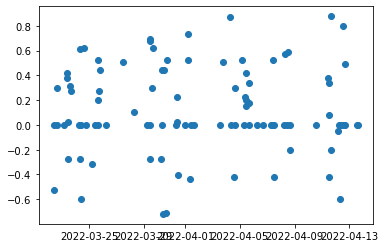

In [31]:
matplotlib_sentiment(sentiment_df['Time posted'],sentiment_df["vadar_compound"])

## FinBERT

In [32]:
sentiment_df_1 = sentiment_df
sentiment_df_1 = sentiment_df_1.rename(columns={'News Headline':'headline'})
sentiment_df_1['stock'] = input_stock

# sentiment_df_1.head()

In [33]:
# merged_data.to_csv('finBERT-W&B.csv')

In [34]:
!git clone https://gist.github.com/3c36fa706f8c1f982b7507d423e299f7.git

fatal: destination path '3c36fa706f8c1f982b7507d423e299f7' already exists and is not an empty directory.


In [35]:
sentiment_df_1.head()

,Time posted,headline,final_sentiment_cleaned,vadar_compound,stock
0,2022-04-13 15:17:00,Markets check: Stocks head higher as earnings ...,market check head higher earnings season kick,0.0000,SPY
1,2022-04-13 13:40:00,"Jobless claims preview: Another 170,000 Americ...",jobless claim preview another 170000 american ...,0.0000,SPY
2,2022-04-12 16:30:00,Inflation: I dont see particular evidence that...,inflation dont see particular evidence peaked ...,0.0000,SPY
3,2022-04-12 15:33:00,The Consumer Price Index Is a Friend to Investors,consumer price index friend investor,0.4939,SPY
4,2022-04-12 15:21:00,Markets check: Stocks turn red as investors mu...,market check turn red investor mull inflation ...,0.0000,SPY


In [36]:
import numpy as np

headlines_array = np.array(sentiment_df_1)
headlines_list = list(headlines_array[:,2])
stocks_list = list(headlines_array[:, -1])

# print(headlines_list)
# print(stocks_list)

In [37]:
# !pip install transformers
# !pip install torch torchvision

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [38]:
import torch

data = []

def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]


STRIDE = 100

model.eval()

n=0
for lines, stocks in zip(chunk_list(headlines_list, STRIDE), chunk_list(stocks_list, STRIDE)):
    input = tokenizer(lines, padding = True, truncation = True,  return_tensors='pt')
    outputs = model(**input)
    prediction = torch.nn.functional.softmax(outputs.logits, dim=-1)
    print(f"{n+1}/{int(len(headlines_list)/STRIDE)}") 
    
    for headline, stock, pos, neg, neutr in zip(lines,stocks, prediction[:, 0].tolist(), prediction[:, 1].tolist(), prediction[:, 2].tolist() ): 
        data.append([headline, stock, pos, neg, neutr])
    finbert_df = pd.DataFrame(data, columns=['headline', 'stock', 'pos', 'neg', 'neutr'])
    
    n+=1
    


1/1


In [39]:
pd.set_option('display.max_colwidth', None)
finbert_df

,headline,stock,pos,neg,neutr
0,market check head higher earnings season kick,SPY,0.112137,0.807836,0.080027
1,jobless claim preview another 170000 american likely filed new claim last week,SPY,0.029444,0.606599,0.363957
2,inflation dont see particular evidence peaked strategist say,SPY,0.092669,0.041909,0.865422
3,consumer price index friend investor,SPY,0.066736,0.041884,0.891380
4,market check turn red investor mull inflation data,SPY,0.067077,0.658864,0.274058
...,...,...,...,...,...
95,investor afraid squiggly line,SPY,0.068943,0.310347,0.620710
96,charge higher market close,SPY,0.118375,0.035901,0.845724
97,market check move higher tesla surge nvidia share fall,SPY,0.825763,0.103163,0.071074
98,5 hottest etf last week,SPY,0.166159,0.105981,0.727860


In [40]:
merged_data = pd.concat([finbert_df, sentiment_df], axis=1).reindex(sentiment_df_1.index)
merged_data = merged_data[['News Headline', 'Time posted', 'stock', 'pos', 'neg', 'neutr']]
merged_data

,News Headline,Time posted,stock,pos,neg,neutr
0,Markets check: Stocks head higher as earnings season kicks off,2022-04-13 15:17:00,SPY,0.112137,0.807836,0.080027
1,"Jobless claims preview: Another 170,000 Americans likely filed new claims last week",2022-04-13 13:40:00,SPY,0.029444,0.606599,0.363957
2,"Inflation: I dont see particular evidence that its peaked, strategist says",2022-04-12 16:30:00,SPY,0.092669,0.041909,0.865422
3,The Consumer Price Index Is a Friend to Investors,2022-04-12 15:33:00,SPY,0.066736,0.041884,0.891380
4,Markets check: Stocks turn red as investors mull inflation data,2022-04-12 15:21:00,SPY,0.067077,0.658864,0.274058
...,...,...,...,...,...,...
95,Should investors be afraid of this squiggly line?,2022-03-23 05:07:00,SPY,0.068943,0.310347,0.620710
96,Stocks charge higher into the market close,2022-03-22 16:15:00,SPY,0.118375,0.035901,0.845724
97,"Market check: Stocks move higher, Tesla stock surges, Nvidia shares fall",2022-03-22 15:15:00,SPY,0.825763,0.103163,0.071074
98,5 Hottest ETFs of Last Week,2022-03-22 11:15:00,SPY,0.166159,0.105981,0.727860


In [41]:
def apply_score(x):
            if (x['pos'] > x['neg']) and (x['pos'] > x['neutr']):
                return 1
            elif (x['neutr'] > x['neg']) and (x['neutr'] > x['pos']):
                return 0
            else:
                return -1

merged_data = pd.concat([finbert_df, sentiment_df], axis=1).reindex(sentiment_df.index)
merged_data = merged_data.T.drop_duplicates().T
merged_data = merged_data[['News Headline', 'Time posted', 'stock', 'pos', 'neg', 'neutr']]
merged_data['score'] = merged_data.apply(lambda x: apply_score(x), axis=1)

In [42]:
merged_data

,News Headline,Time posted,stock,pos,neg,neutr,score
0,Markets check: Stocks head higher as earnings season kicks off,2022-04-13 15:17:00,SPY,0.112137,0.807836,0.080027,-1
1,"Jobless claims preview: Another 170,000 Americans likely filed new claims last week",2022-04-13 13:40:00,SPY,0.029444,0.606599,0.363957,-1
2,"Inflation: I dont see particular evidence that its peaked, strategist says",2022-04-12 16:30:00,SPY,0.092669,0.041909,0.865422,0
3,The Consumer Price Index Is a Friend to Investors,2022-04-12 15:33:00,SPY,0.066736,0.041884,0.89138,0
4,Markets check: Stocks turn red as investors mull inflation data,2022-04-12 15:21:00,SPY,0.067077,0.658864,0.274058,-1
...,...,...,...,...,...,...,...
95,Should investors be afraid of this squiggly line?,2022-03-23 05:07:00,SPY,0.068943,0.310347,0.62071,0
96,Stocks charge higher into the market close,2022-03-22 16:15:00,SPY,0.118375,0.035901,0.845724,0
97,"Market check: Stocks move higher, Tesla stock surges, Nvidia shares fall",2022-03-22 15:15:00,SPY,0.825763,0.103163,0.071074,1
98,5 Hottest ETFs of Last Week,2022-03-22 11:15:00,SPY,0.166159,0.105981,0.72786,0


In [44]:
merged_data['date'] = merged_data['Time posted'].apply(lambda x: pd.Timestamp(x).date())

In [45]:
merged_data

,News Headline,Time posted,stock,pos,neg,neutr,score,date
0,Markets check: Stocks head higher as earnings season kicks off,2022-04-13 15:17:00,SPY,0.112137,0.807836,0.080027,-1,2022-04-13
1,"Jobless claims preview: Another 170,000 Americans likely filed new claims last week",2022-04-13 13:40:00,SPY,0.029444,0.606599,0.363957,-1,2022-04-13
2,"Inflation: I dont see particular evidence that its peaked, strategist says",2022-04-12 16:30:00,SPY,0.092669,0.041909,0.865422,0,2022-04-12
3,The Consumer Price Index Is a Friend to Investors,2022-04-12 15:33:00,SPY,0.066736,0.041884,0.89138,0,2022-04-12
4,Markets check: Stocks turn red as investors mull inflation data,2022-04-12 15:21:00,SPY,0.067077,0.658864,0.274058,-1,2022-04-12
...,...,...,...,...,...,...,...,...
95,Should investors be afraid of this squiggly line?,2022-03-23 05:07:00,SPY,0.068943,0.310347,0.62071,0,2022-03-23
96,Stocks charge higher into the market close,2022-03-22 16:15:00,SPY,0.118375,0.035901,0.845724,0,2022-03-22
97,"Market check: Stocks move higher, Tesla stock surges, Nvidia shares fall",2022-03-22 15:15:00,SPY,0.825763,0.103163,0.071074,1,2022-03-22
98,5 Hottest ETFs of Last Week,2022-03-22 11:15:00,SPY,0.166159,0.105981,0.72786,0,2022-03-22


In [ ]:
#Check Sentiment Analysis Correlation

In [46]:
#Group score into date
new_data_grp_score = pd.DataFrame(merged_data.groupby('date')['score'].sum())

In [48]:
#Get SPY Score
import yfinance as yf
ticker = 'SPY'
panel_data = yf.download(ticker, start='2022-03-22', end='2022-04-13')

[*********************100%***********************]  1 of 1 completed


In [49]:
panel_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,444.339996,446.459991,440.679993,444.390015,444.390015,88349800
2022-03-22,445.859985,450.579987,445.859985,449.589996,449.589996,74650400
2022-03-23,446.910004,448.489990,443.709991,443.799988,443.799988,79426100
2022-03-24,445.940002,450.500000,444.760010,450.489990,450.489990,64736900
2022-03-25,451.160004,452.980011,448.429993,452.690002,452.690002,77101300
2022-03-28,452.059998,455.910004,450.059998,455.910004,455.910004,68529800
2022-03-29,460.019989,462.070007,457.179993,461.549988,461.549988,86581500
2022-03-30,460.339996,461.200012,456.470001,458.700012,458.700012,79666900
2022-03-31,457.890015,458.760010,451.160004,451.640015,451.640015,121699900


In [51]:
merged_score = pd.merge(panel_data['Close'], new_data_grp_score, left_index=True, right_index=True)

In [52]:
merged_score

,Close,score
2022-03-22,449.589996,1
2022-03-23,443.799988,-1
2022-03-24,450.489990,-1
2022-03-25,452.690002,-1
2022-03-28,455.910004,0
2022-03-29,461.549988,0
2022-03-30,458.700012,0
2022-03-31,451.640015,-3
2022-04-01,452.920013,-2
2022-04-04,456.799988,2


In [54]:
merged_score['sentiment_1'] = merged_score['score'].shift(1)
# Perform return series
pct_change = merged_score['Close'].pct_change()
# calculate the return series
merged_score['return_series'] = (1 + pct_change).cumprod() - 1

In [55]:
merged_score

,Close,score,sentiment_1,return_series
2022-03-22,449.589996,1,NaN,NaN
2022-03-23,443.799988,-1,1.0,-0.012878
2022-03-24,450.489990,-1,-1.0,0.002002
2022-03-25,452.690002,-1,-1.0,0.006895
2022-03-28,455.910004,0,-1.0,0.014057
2022-03-29,461.549988,0,0.0,0.026602
2022-03-30,458.700012,0,0.0,0.020263
2022-03-31,451.640015,-3,0.0,0.004560
2022-04-01,452.920013,-2,-3.0,0.007407
2022-04-04,456.799988,2,-2.0,0.016037


<AxesSubplot:xlabel='sentiment_1'>

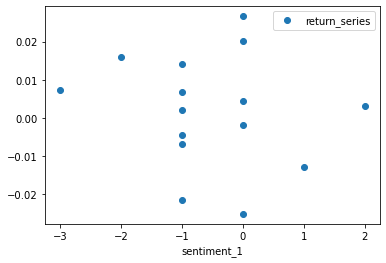

In [56]:
merged_score.plot(x='sentiment_1', y='return_series', style="o")

In [59]:
merged_score['return_series'].corr(merged_score['sentiment_1'])

-0.1473117063262137